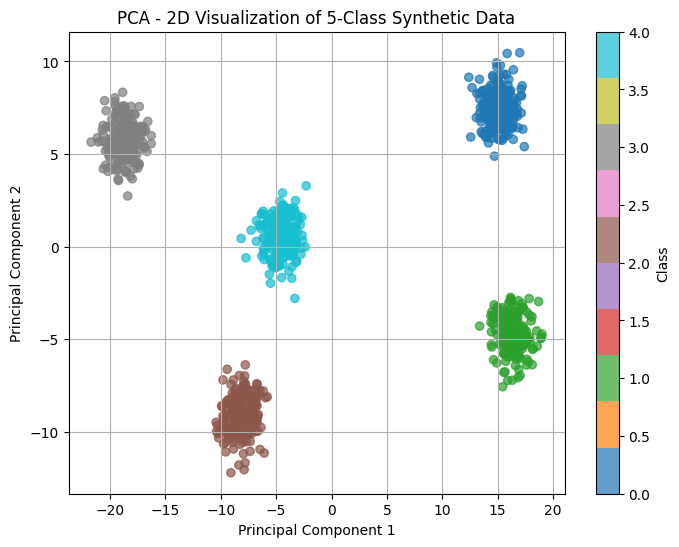

((1000, 10), (1000, 5))

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Generate synthetic data with clear separation
X, y = make_blobs(n_samples=1000, centers=5, n_features=10, cluster_std=1.0, random_state=42)

# One-hot encode labels
# The 'sparse' argument has been replaced with 'sparse_output' in newer versions of scikit-learn.
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
y_test_labels = np.argmax(y_test, axis=1)  # for evaluation

# Visualize the data using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting PCA visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title("PCA - 2D Visualization of 5-Class Synthetic Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Class")
plt.grid(True)
plt.show()

X.shape, y_encoded.shape

In [5]:
# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, output_size):
        self.w1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))

        self.w2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))

        self.w3 = np.random.randn(hidden2_size, hidden3_size)
        self.b3 = np.zeros((1, hidden3_size))

        self.w4 = np.random.randn(hidden3_size, output_size)
        self.b4 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = sigmoid(self.z3)

        self.z4 = np.dot(self.a3, self.w4) + self.b4
        self.output = softmax(self.z4)

        return self.output

    def backward(self, X, y, lr):
        m = y.shape[0]
        dz4 = self.output - y
        dw4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m

        dz3 = np.dot(dz4, self.w4.T) * sigmoid_derivative(self.a3)
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        dz2 = np.dot(dz3, self.w3.T) * sigmoid_derivative(self.a2)
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.w2.T) * sigmoid_derivative(self.a1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.w4 -= lr * dw4
        self.b4 -= lr * db4
        self.w3 -= lr * dw3
        self.b3 -= lr * db3
        self.w2 -= lr * dw2
        self.b2 -= lr * db2
        self.w1 -= lr * dw1
        self.b1 -= lr * db1

    def train(self, X_train, y_train, X_test, y_test, epochs=500, lr=0.01):
        self.train_loss_history = []
        self.train_acc_history = []
        self.test_acc_history = []

        for i in range(epochs):
            self.forward(X_train)
            self.backward(X_train, y_train, lr)

            # Track metrics
            loss = -np.mean(np.sum(y_train * np.log(self.output + 1e-9), axis=1))
            self.train_loss_history.append(loss)

            train_pred = np.argmax(self.output, axis=1)
            train_true = np.argmax(y_train, axis=1)
            train_acc = np.mean(train_pred == train_true)
            self.train_acc_history.append(train_acc)

            test_output = self.forward(X_test)
            test_pred = np.argmax(test_output, axis=1)
            test_true = np.argmax(y_test, axis=1)
            test_acc = np.mean(test_pred == test_true)
            self.test_acc_history.append(test_acc)

            if i % 50 == 0:
                print(f"Epoch {i}: Loss={loss:.4f}, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}")

# Initialize and train the network
nn = NeuralNetwork(input_size=10, hidden1_size=64, hidden2_size=32, hidden3_size=16, output_size=5)
nn.train(X_train, y_train, X_test, y_test, epochs=500, lr=0.05)


Epoch 0: Loss=4.9367, Train Acc=0.1975, Test Acc=0.2100
Epoch 50: Loss=1.0100, Train Acc=0.6100, Test Acc=0.5650
Epoch 100: Loss=0.7166, Train Acc=0.8688, Test Acc=0.8650
Epoch 150: Loss=0.5601, Train Acc=0.9900, Test Acc=1.0000
Epoch 200: Loss=0.4525, Train Acc=0.9975, Test Acc=1.0000
Epoch 250: Loss=0.3735, Train Acc=1.0000, Test Acc=1.0000
Epoch 300: Loss=0.3152, Train Acc=1.0000, Test Acc=1.0000
Epoch 350: Loss=0.2708, Train Acc=1.0000, Test Acc=1.0000
Epoch 400: Loss=0.2361, Train Acc=1.0000, Test Acc=1.0000
Epoch 450: Loss=0.2083, Train Acc=1.0000, Test Acc=1.0000


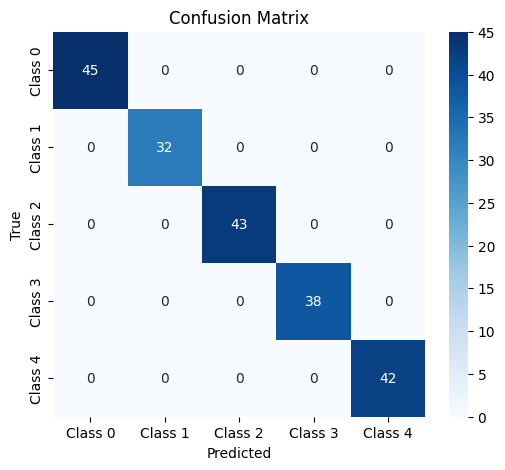

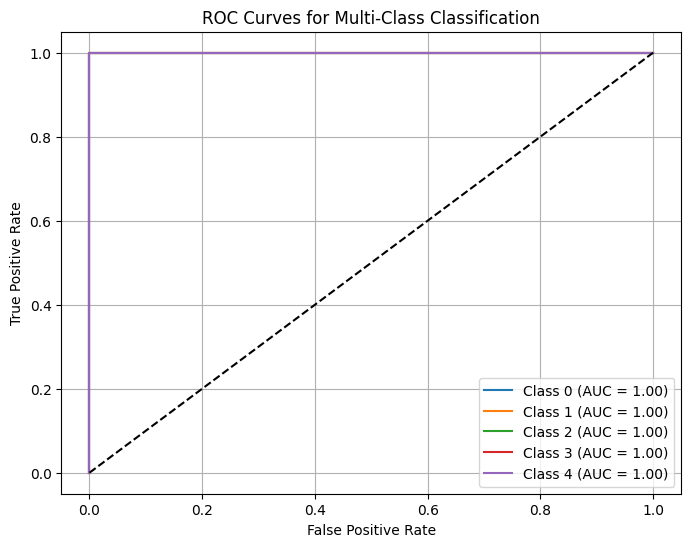

'              precision    recall  f1-score   support\n\n     Class 0       1.00      1.00      1.00        45\n     Class 1       1.00      1.00      1.00        32\n     Class 2       1.00      1.00      1.00        43\n     Class 3       1.00      1.00      1.00        38\n     Class 4       1.00      1.00      1.00        42\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

In [8]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# Predict on test set
y_pred_probs = nn.forward(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=[f"Class {i}" for i in range(5)], output_dict=True)
report_text = classification_report(y_test_labels, y_pred_labels, target_names=[f"Class {i}" for i in range(5)])

# Confusion Matrix
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[f"Class {i}" for i in range(5)],
            yticklabels=[f"Class {i}" for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

report_text


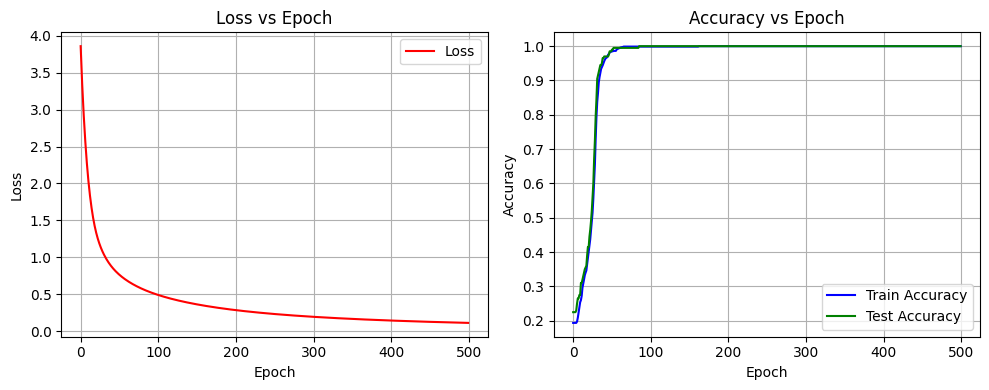

In [9]:
import matplotlib.pyplot as plt

# Plot Loss vs Epoch
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(nn.train_loss_history, label='Loss', color='red')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy vs Epoch
plt.subplot(1, 2, 2)
plt.plot(nn.train_acc_history, label='Train Accuracy', color='blue')
plt.plot(nn.test_acc_history, label='Test Accuracy', color='green')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
